In [3]:
# Import pustaka yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
# Load dataset hasil pelabelan
df = pd.read_csv('INA_TweetsPPKM_Labeled_Pure.csv', sep='\t')
# Tampilkan informasi awal
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23644 entries, 0 to 23643
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23644 non-null  object
 1   User       23644 non-null  object
 2   Tweet      23644 non-null  object
 3   sentiment  23644 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 739.0+ KB


,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1


C:\Users\asus\AppData\Local\Temp\ipykernel_9020\783091041.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


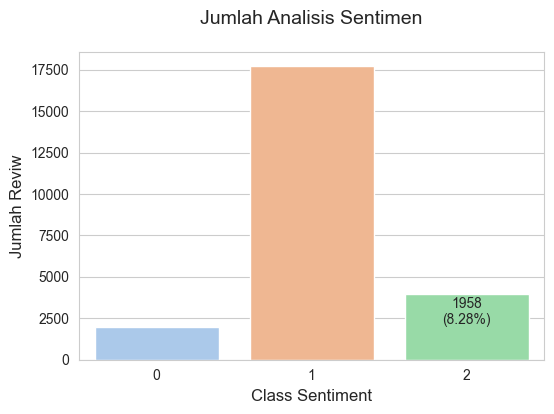

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df['sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Reviw', fontsize=12)

total = len(df['sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center',
va='bottom')

plt.show()

In [13]:
# Import pustaka yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset hasil pelabelan
df = pd.read_csv('INA_TweetsPPKM_Labeled_Pure.csv', sep='\t')
# Tampilkan informasi awal
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23644 entries, 0 to 23643
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23644 non-null  object
 1   User       23644 non-null  object
 2   Tweet      23644 non-null  object
 3   sentiment  23644 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 739.0+ KB


,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1


In [14]:
df['sentiment'].value_counts()

sentiment
1    17706
2     3980
0     1958
Name: count, dtype: int64

Jumlah data latih: 18915
Jumlah data uji: 4729


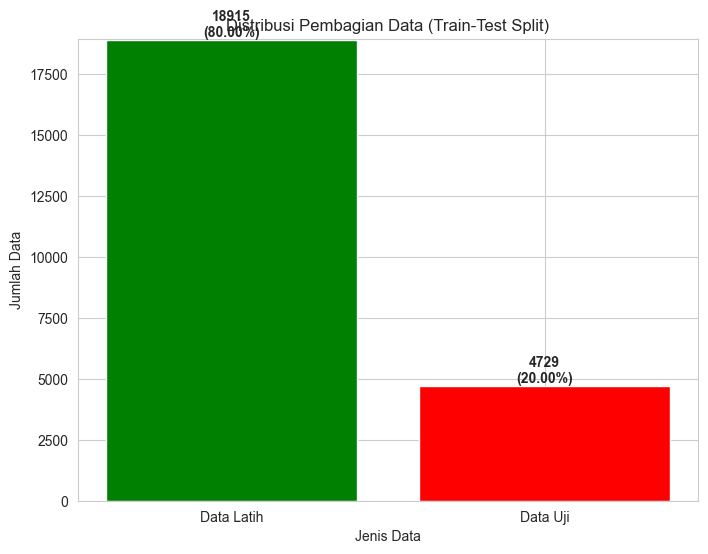

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Pastikan kolom yang digunakan benar
# Jika belum melakukan stemming, gunakan 'Tweet'
# Gunakan 'sentiment' (huruf kecil)
X = df['Tweet'] 
y = df['sentiment']

# 2. Membagi data (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Simpan ke file BERBEDA (Jangan menimpa file asli!)
train_data = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_data.to_csv('train_data.csv', index=False)

test_data = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_data.to_csv('test_data.csv', index=False)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

# 4. Membuat Plot
train_size = len(X_train)
test_size = len(X_test)
total_size = train_size + test_size

plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['green', 'red'])

# Menambahkan label persentase di atas bar
for bar in bars:
    height = bar.get_height()
    percentage = f'{(height / total_size) * 100:.2f}%'
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}\n({percentage})', 
             ha='center', va='bottom', fontweight='bold')

plt.title('Distribusi Pembagian Data (Train-Test Split)')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.ylim(0, max(train_size, test_size) + 50) # Memberi ruang untuk teks
plt.show()

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Ganti NaN dengan string kosong atau hapus baris yang mengandung NaN
X_train = X_train.fillna("") # atau X_train.dropna()
X_test = X_test.fillna("")
#Mendefinisikan vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
#Menampilkan hasil vektorisasi
print("Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized.toarray())
# menampilkan sebagian kecil matriks
print("\nSebagian kecil Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized[:5, :].toarray())
#membuat dan melatih model SVM
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian kecil Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [21]:
#evaluasi model
y_pred = svm.predict(X_test_vectorized)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.43      0.53       377
           1       0.91      0.95      0.93      3569
           2       0.74      0.76      0.75       783

    accuracy                           0.88      4729
   macro avg       0.79      0.71      0.74      4729
weighted avg       0.87      0.88      0.87      4729



Confusion Matrix:
[[ 161  149   67]
 [  47 3384  138]
 [  19  171  593]]


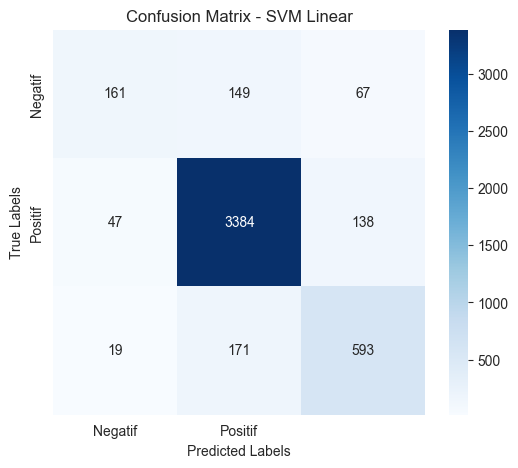

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan confusion matrix dalam angka
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Fungsi untuk plot confusion matrix (Sudah diperbaiki indentasinya)
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                cbar=True, 
                xticklabels=['Negatif', 'Positif'], 
                yticklabels=['Negatif', 'Positif'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Panggil fungsi
plot_confusion_matrix('SVM Linear', y_test, y_pred)

In [25]:
#Menampilkan accuracy untuk SVM
accuracy_svm = accuracy_score (y_test, y_pred)
print("SVM Accuracy:", accuracy_svm)
print("")
accuracy_svm_percentage = accuracy_svm * 100
print("SVM Accuracy:", "{:.2f}%".format(accuracy_svm_percentage))
print("")
#Menampilkan classification report untuk SVM print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.8750264326496088

SVM Accuracy: 87.50%

              precision    recall  f1-score   support

           0       0.71      0.43      0.53       377
           1       0.91      0.95      0.93      3569
           2       0.74      0.76      0.75       783

    accuracy                           0.88      4729
   macro avg       0.79      0.71      0.74      4729
weighted avg       0.87      0.88      0.87      4729



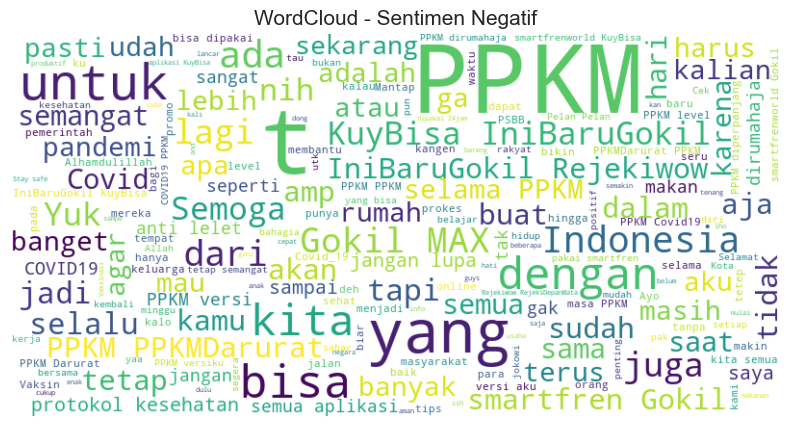

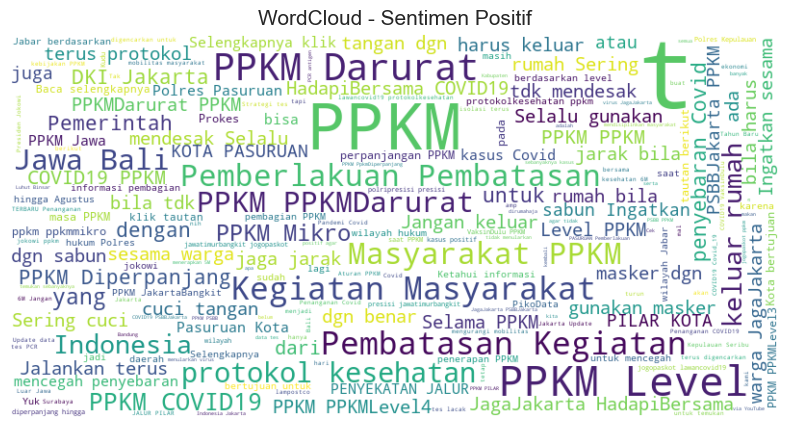

In [33]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Pisahkan dataset berdasarkan angka label (0=Negatif, 1=Positif)
# Gunakan astype(str) untuk memastikan tidak ada error jika ada data kosong
sentimen_negatif = df[df['sentiment'] == 0]['Tweet'].astype(str).str.cat(sep=' ')
sentimen_positif = df[df['sentiment'] == 1]['Tweet'].astype(str).str.cat(sep=' ')

# 2. Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    # Pastikan teks tidak kosong agar tidak error
    if not text.strip():
        print(f"Peringatan: Teks untuk '{title}' kosong.")
        return

    # Daftar kata yang ingin dibuang (Stopwords)
    stop_words = ['https', 'co', 'rt', 'dan', 'yg', 'di', 'ke', 'ini', 'itu', 'nya', 'ya']
    
    # PROSES PEMBUATAN (Harus masuk indentasi/menjorok ke dalam)
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        random_state=42, 
        max_font_size=100, 
        background_color='white',
        stopwords=stop_words
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.show()

# 3. Panggil fungsinya
create_wordcloud(sentimen_negatif, 'WordCloud - Sentimen Negatif')
create_wordcloud(sentimen_positif, 'WordCloud - Sentimen Positif')

In [35]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Inisialisasi Vectorizer
tfidf = TfidfVectorizer(max_features=2500)

# 2. Transformasi data (asumsi df['Tweet'] sudah dibersihkan)
X = tfidf.fit_transform(df['Tweet'].astype(str))
y = df['sentiment']

# 3. Latih model SVM (Gunakan kernel linear sesuai instruksi modul)
model = SVC(kernel='linear', probability=True)
model.fit(X, y)

print("Model SVM berhasil dilatih!")

Model SVM berhasil dilatih!


In [36]:
import pickle

# Simpan model SVM (variabel 'model' sudah ada sekarang)
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Simpan TF-IDF Vectorizer (variabel 'tfidf' sudah ada sekarang)
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("File model.pkl dan tfidf_vectorizer.pkl berhasil disimpan!")

File model.pkl dan tfidf_vectorizer.pkl berhasil disimpan!
